## NivLink Demo: Multiple Screens with Varying AoI Distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as io
import pandas as pd
from pandas import DataFrame, read_csv
from nivlink import ScreenInfo
from nivlink import epoching_fht, align_to_aoi, compute_fixations

sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

### Multiple screens with non-overlapping rectangular AoIs.

In [ ]:
## Define metadata.
xdim, ydim, sfreq, n_screens = 1600, 1200, 500, 3 

## Initialize ScreenInfo object.
info = ScreenInfo(xdim, ydim, sfreq, n_screens)

## Define rectangular AoIs.
n_aois = 9
aois = np.empty((n_aois,2,2))
# Left column
aois[0] = np.matrix([[425, 325], [575, 475]])
aois[1] = np.matrix([[425, 525], [575, 675]])
aois[2] = np.matrix([[425, 725], [575, 875]])
# Middle column
aois[3] = np.matrix([[725, 325], [875, 475]])
aois[4] = np.matrix([[725, 525], [875, 675]])
aois[5] = np.matrix([[725, 725], [875, 875]])
# Right column
aois[6] = np.matrix([[1025, 325], [1175, 475]])
aois[7] = np.matrix([[1025, 525], [1175, 675]])
aois[8] = np.matrix([[1025, 725], [1175, 875]])

## Loop over AoIs and add to ScreenInfo object. 
for a in range(0, n_aois):
    # Determine which screen to add AoI to. 
    if (a+1) < 4: sid = 1
    elif ((a+1) > 3) & ((a+1) <= 6): sid = 2
    elif (a+1) > 6: sid = 3
    info.add_rectangle_aoi(aois[a,0,0], aois[a,1,0], aois[a,0,1], aois[a,1,1], sid)    

## Visually inspect AoIs. 
fig, ax = info.plot_aoi(1,6)
fig, ax = info.plot_aoi(2,6)
fig, ax = info.plot_aoi(3,6)


### Multiple screens with overlapping ellipsoid AoIs.

In [2]:
## Define metadata.
xdim, ydim, sfreq, n_screens = 1600, 1200, 500, 3 

## Initialize ScreenInfo object.
info = ScreenInfo(xdim, ydim, sfreq, n_screens)

## Define ellipsoid AoIs.
aois = np.empty((2,5)) # center x-coord, center y-coord, x-radius, y-radius
# Left ellipse
aois[0] = [400, 400, 200, 400, np.radians(-135)]
# Right ellipse
aois[1] = [1200, 400, 200, 400, np.radians(135)]

## Add to different screens.
# Screen 1: both ellipses
info.add_ellipsoid_aoi(aois[0,0], aois[0,1], aois[0,2], aois[0,3], aois[0,4], 1)
info.add_ellipsoid_aoi(aois[1,0], aois[1,1], aois[1,2], aois[1,3], aois[1,4], 1)
# Screen 2: left ellipse only
info.add_ellipsoid_aoi(aois[0,0], aois[0,1], aois[0,2], aois[0,3], aois[0,4], 2)
# Screen 3: right ellipse only
info.add_ellipsoid_aoi(aois[1,0], aois[1,1], aois[1,2], aois[1,3], aois[1,4], 3)

## Visually inspect AoIs. 
fig, ax = info.plot_aoi(1,6)
fig, ax = info.plot_aoi(2,6)
fig, ax = info.plot_aoi(3,6)


NameError: name 'ScreenInfo' is not defined

### Multiple screens with overlapping half-ellipsoid AoIs.
Demonstrates use of masking in creating AoIs.

#### Initialize screen and define base AoIs.

In [8]:
## Define metadata.
xdim, ydim, sfreq, n_screens = 1600, 1200, 500, 4 

## Initialize ScreenInfo object.
info = ScreenInfo(xdim, ydim, sfreq, n_screens)

## Define ellipsoid AoIs.
aois = np.empty((2,5)) # center x-coord, center y-coord, x-radius, y-radius
# Left ellipse
aois[0] = [400, 400, 200, 400, np.radians(-135)]
# Right ellipse
aois[1] = [1200, 400, 200, 400, np.radians(135)]

#### Define masks.

In [5]:
# Create screen sized array with unraveled indices.
[X,Y] = np.unravel_index(np.arange(xdim * ydim),(xdim, ydim))

# np.arange(xdim*ydim) gives the indices of the array we want to unravel if the array were flat. 
# Here we want all indices in the array. 
# np.unravel_index asks, what should have been the X and Y indices if we had an array of a particular shape
# The point of this is so that we get a pixel representation of the x,y coordinate plane

# Make mask that keeps upper half of left ellipse.
mask1 = np.reshape(X < Y, (xdim, ydim)).astype(int)

# Make mask that keeps lower half of left ellipse.
mask2 = np.reshape(X > Y, (xdim, ydim)).astype(int)

# Make mask that keeps lower half of right ellipse.
mask3 = np.reshape(X < -Y + xdim, (xdim, ydim)).astype(int)

# Make mask that keeps upper half of right ellipse.
mask4 = np.reshape(X > -Y + xdim, (xdim, ydim)).astype(int)



#### Add AoIs to different screens.

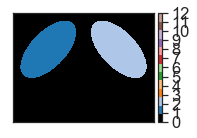

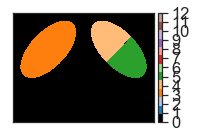

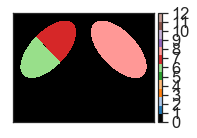

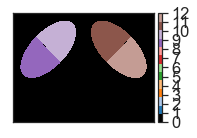

In [10]:
# Screen 1: whole ellipses
info.add_ellipsoid_aoi(aois[0,0], aois[0,1], aois[0,2], aois[0,3], aois[0,4], 1)
info.add_ellipsoid_aoi(aois[1,0], aois[1,1], aois[1,2], aois[1,3], aois[1,4], 1)

# Screen 2: whole left ellipse, halved right ellipse
info.add_ellipsoid_aoi(aois[0,0], aois[0,1], aois[0,2], aois[0,3], aois[0,4], 2)
info.add_ellipsoid_aoi(aois[1,0], aois[1,1], aois[1,2], aois[1,3], aois[1,4], 2, mask3)
info.add_ellipsoid_aoi(aois[1,0], aois[1,1], aois[1,2], aois[1,3], aois[1,4], 2, mask4)

# Screen 3: halved left ellipse, whole right ellipse
info.add_ellipsoid_aoi(aois[0,0], aois[0,1], aois[0,2], aois[0,3], aois[0,4], 3, mask1)
info.add_ellipsoid_aoi(aois[0,0], aois[0,1], aois[0,2], aois[0,3], aois[0,4], 3, mask2)
info.add_ellipsoid_aoi(aois[1,0], aois[1,1], aois[1,2], aois[1,3], aois[1,4], 3)

# Screen 4: halved left ellipse, halved right ellipse
info.add_ellipsoid_aoi(aois[0,0], aois[0,1], aois[0,2], aois[0,3], aois[0,4], 4, mask1)
info.add_ellipsoid_aoi(aois[0,0], aois[0,1], aois[0,2], aois[0,3], aois[0,4], 4, mask2)
info.add_ellipsoid_aoi(aois[1,0], aois[1,1], aois[1,2], aois[1,3], aois[1,4], 4, mask3)
info.add_ellipsoid_aoi(aois[1,0], aois[1,1], aois[1,2], aois[1,3], aois[1,4], 4, mask4)


#### Visually inspect AoIs. 

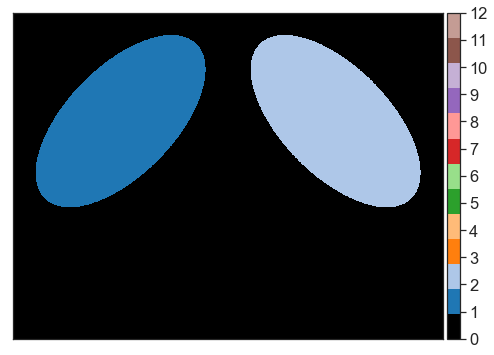

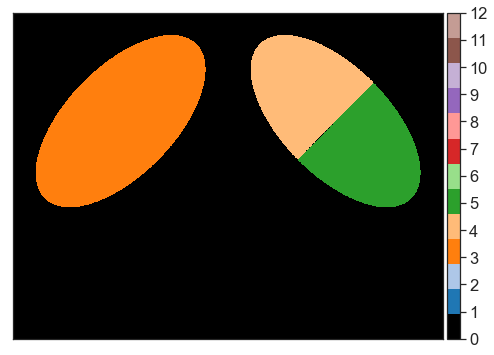

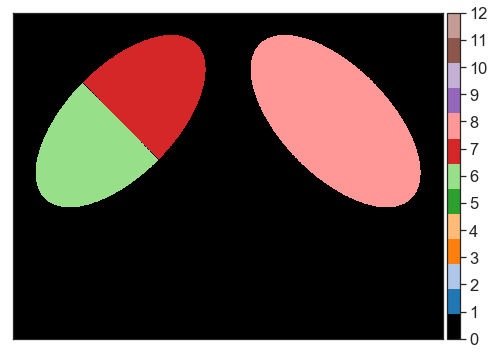

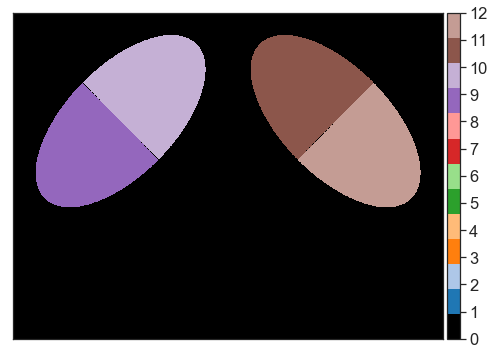

In [13]:
fig, ax = info.plot_aoi(1,6,)
fig, ax = info.plot_aoi(2,6,)
fig, ax = info.plot_aoi(3,6,)
fig, ax = info.plot_aoi(4,6,)